In [2]:
#all imports required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log2 as log
%matplotlib inline

In [3]:
df_ecommerce = pd.read_csv("E-Commerce Shipping_data.csv", index_col=0)
df_ecommerce

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10997,C,Ship,5,4,242,5,low,F,4,1155,0


In [4]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [5]:
df_ecommerce.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

Data Explorations:

Warehouse Block:

In [6]:
df_ecommerce['Warehouse_block'].describe()

count     10999
unique        5
top           F
freq       3666
Name: Warehouse_block, dtype: object

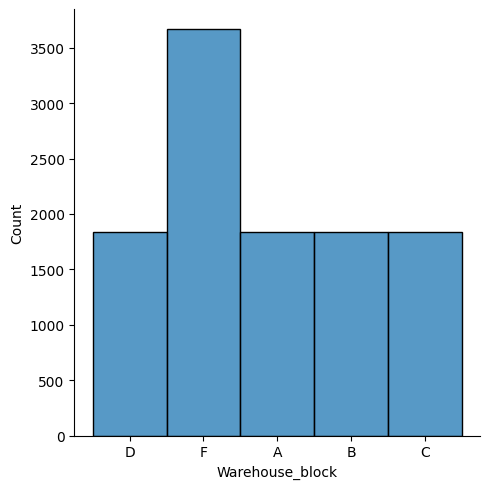

In [7]:
sns.displot(df_ecommerce['Warehouse_block'])

#alle außer F(~3666) kommen gleich oft vor (~1800)

Mode of Shipment:

In [8]:
df_ecommerce['Mode_of_Shipment'].describe()

count     10999
unique        3
top        Ship
freq       7462
Name: Mode_of_Shipment, dtype: object

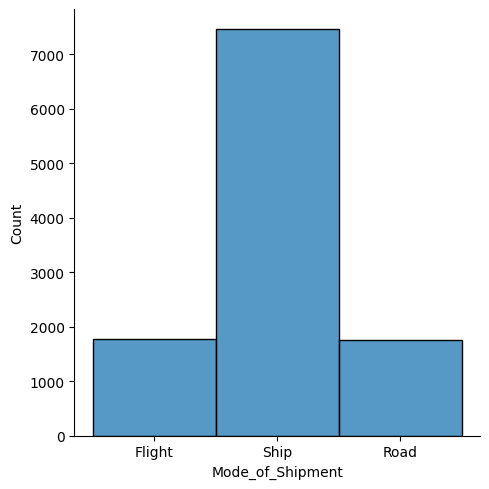

In [9]:
sns.displot(df_ecommerce['Mode_of_Shipment'])

#Ship 7462, Flight und Road beide ~1800

Customer Rating:

In [10]:
df_ecommerce['Customer_rating'].describe()

#durchschnitt 2.99 mit hoher(?) standartabweichung von 1.4

count    10999.000000
mean         2.990545
std          1.413603
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Customer_rating, dtype: float64

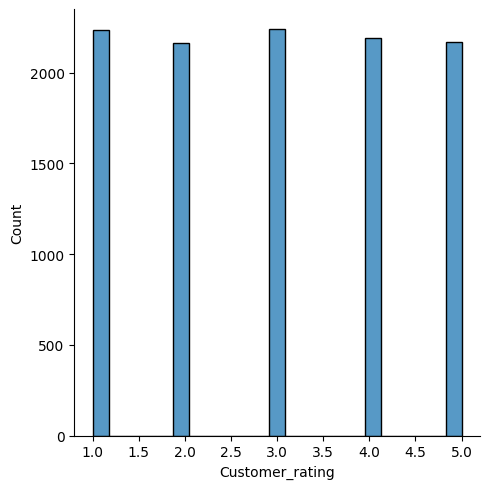

In [11]:
sns.displot(df_ecommerce['Customer_rating'])

#sagt uns garnix TEST

Prior Purchases:

In [12]:
df_ecommerce['Prior_purchases'].describe()

#durchschnitt 3.57 mit standartabweichung 1.52

count    10999.000000
mean         3.567597
std          1.522860
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Prior_purchases, dtype: float64

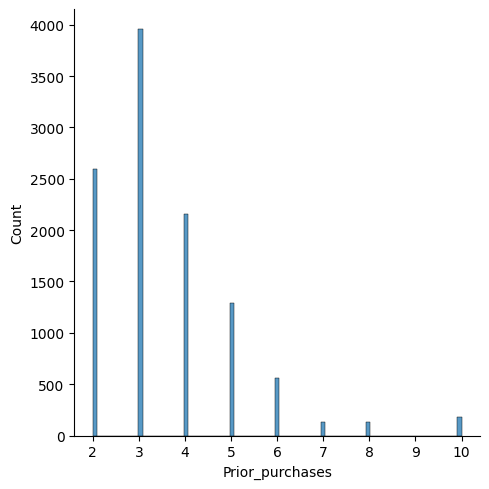

In [13]:
sns.displot(df_ecommerce['Prior_purchases'])

Customer Care Calls:

In [14]:
df_ecommerce['Customer_care_calls'].describe()

# durchschnitt 4.05 mit standartabweichung 1.14

count    10999.000000
mean         4.054459
std          1.141490
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Customer_care_calls, dtype: float64

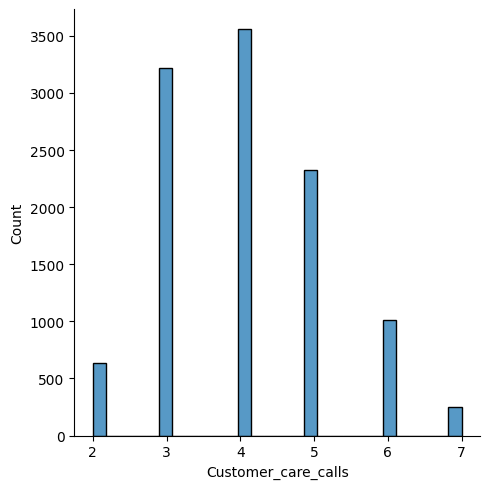

In [15]:
sns.displot(df_ecommerce['Customer_care_calls'])

Cost of Product:

In [16]:
df_ecommerce['Cost_of_the_Product'].describe()

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64

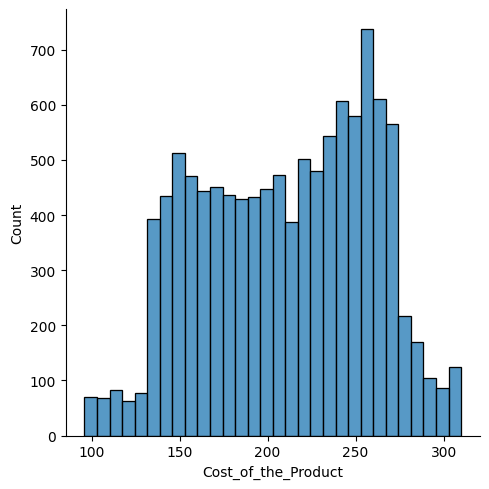

In [17]:
sns.displot(df_ecommerce['Cost_of_the_Product'])

Product Importance:

In [18]:
df_ecommerce['Product_importance'].describe()

count     10999
unique        3
top         low
freq       5297
Name: Product_importance, dtype: object

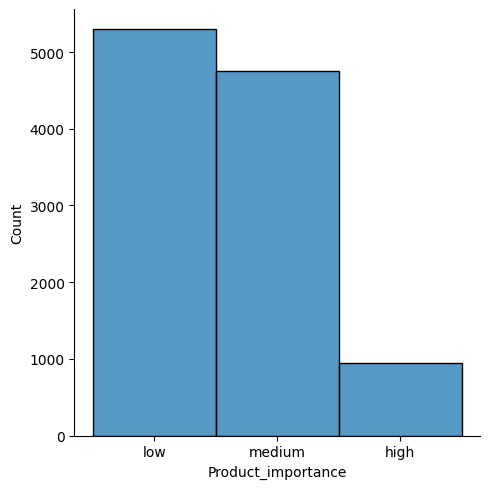

In [19]:
sns.displot(df_ecommerce['Product_importance'])

#low 5297, medium ~4800, high ~900

Gender:

In [20]:
df_ecommerce['Gender'].describe()

# Female 5545, Male 5454 also ~50/50

count     10999
unique        2
top           F
freq       5545
Name: Gender, dtype: object

Discount offered: 

In [21]:
df_ecommerce['Discount_offered'].describe()

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

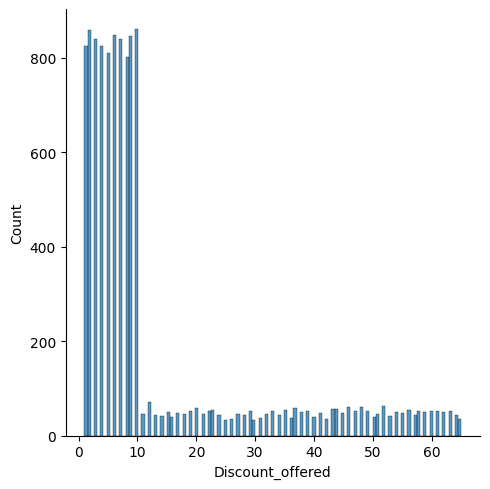

In [22]:
sns.displot(df_ecommerce['Discount_offered'])

#mehrheitlich(75%) weniger als 10%

Weight in gms:

In [23]:
df_ecommerce['Weight_in_gms'].describe()

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64

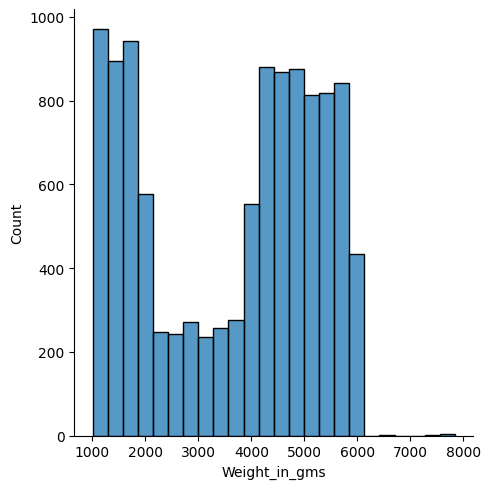

In [24]:
sns.displot(df_ecommerce['Weight_in_gms'])

#viel wiegt unter 2000 und viel zwischen 4000 - 6000

#TODO wie viel genau und Zusammenhänge(?)

Reached on time:

In [25]:
df_ecommerce['Reached.on.Time_Y.N'].describe()

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Reached.on.Time_Y.N, dtype: float64

In [26]:
df_ontime = pd.read_csv("E-Commerce Shipping_data.csv", usecols=['ID','Reached.on.Time_Y.N'])
df_ontime.groupby(['Reached.on.Time_Y.N']).count()

#4436 sind nicht on time angekommen, 6563 sind es

,ID
Reached.on.Time_Y.N,
0,4436
1,6563


Korrelation zwischen Customer Rating und Cost of Product:

(-0.5, 214.5, 0.0, 6.0)

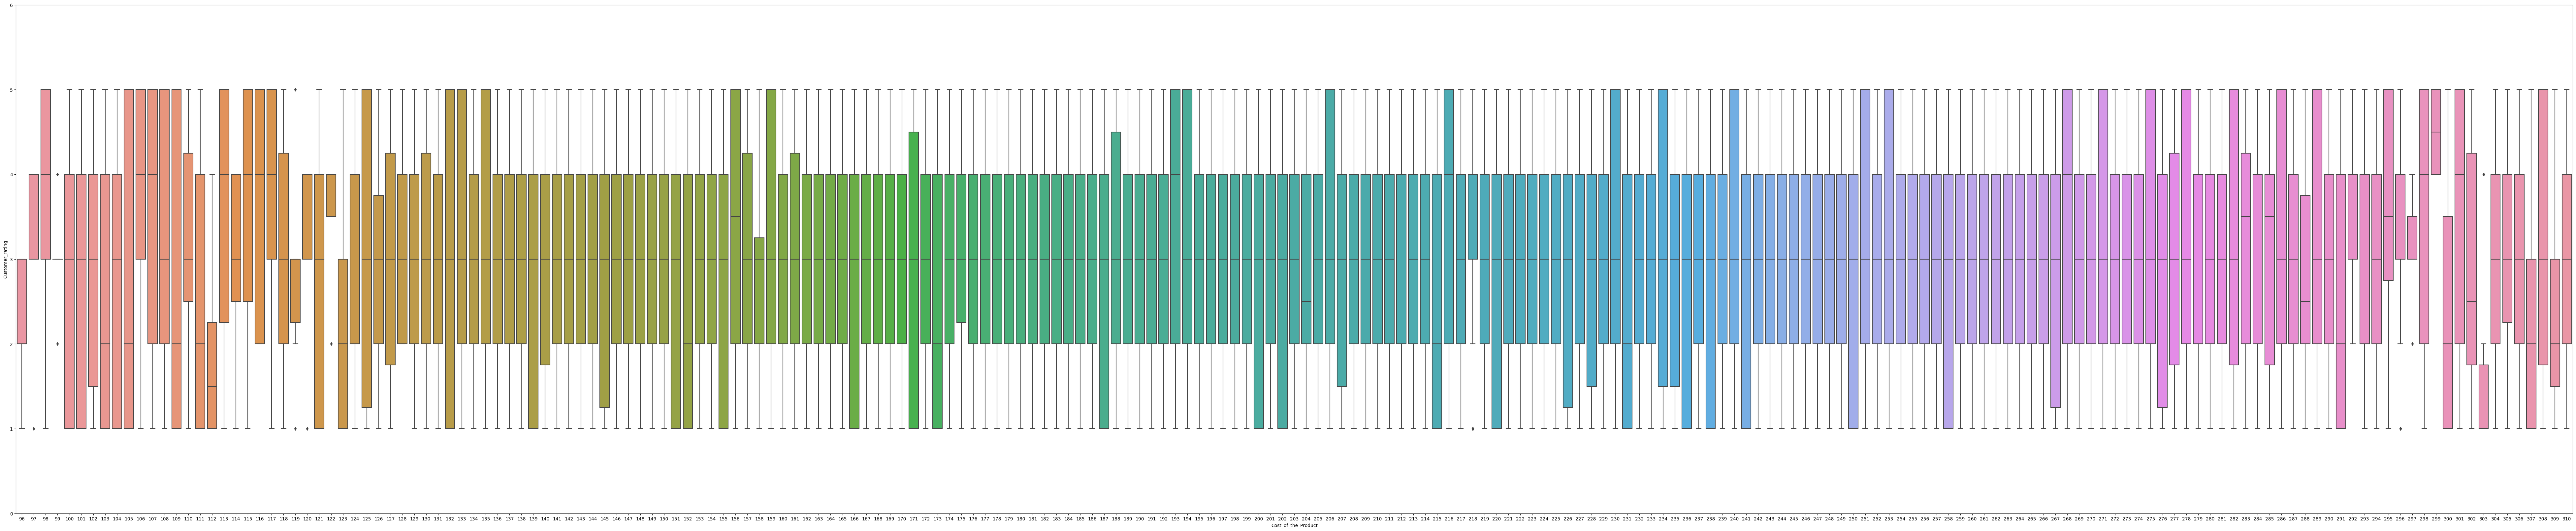

In [27]:
cost = 'Cost_of_the_Product'
rating = 'Customer_rating'
data = pd.concat([df_ecommerce[cost], df_ecommerce[rating]], axis=1)
f, ax = plt.subplots(figsize=(100, 20))
fig = sns.boxplot(x=cost, y=rating, data=data)
fig.axis(ymin=0, ymax=6)

# korreliert nicht

#TODO Nicht-Korrelation besser beweisen/veranschaulichen

Korrelation zwischen Customer Rating und Customer Calls:

(-0.5, 5.5, 0.0, 6.0)

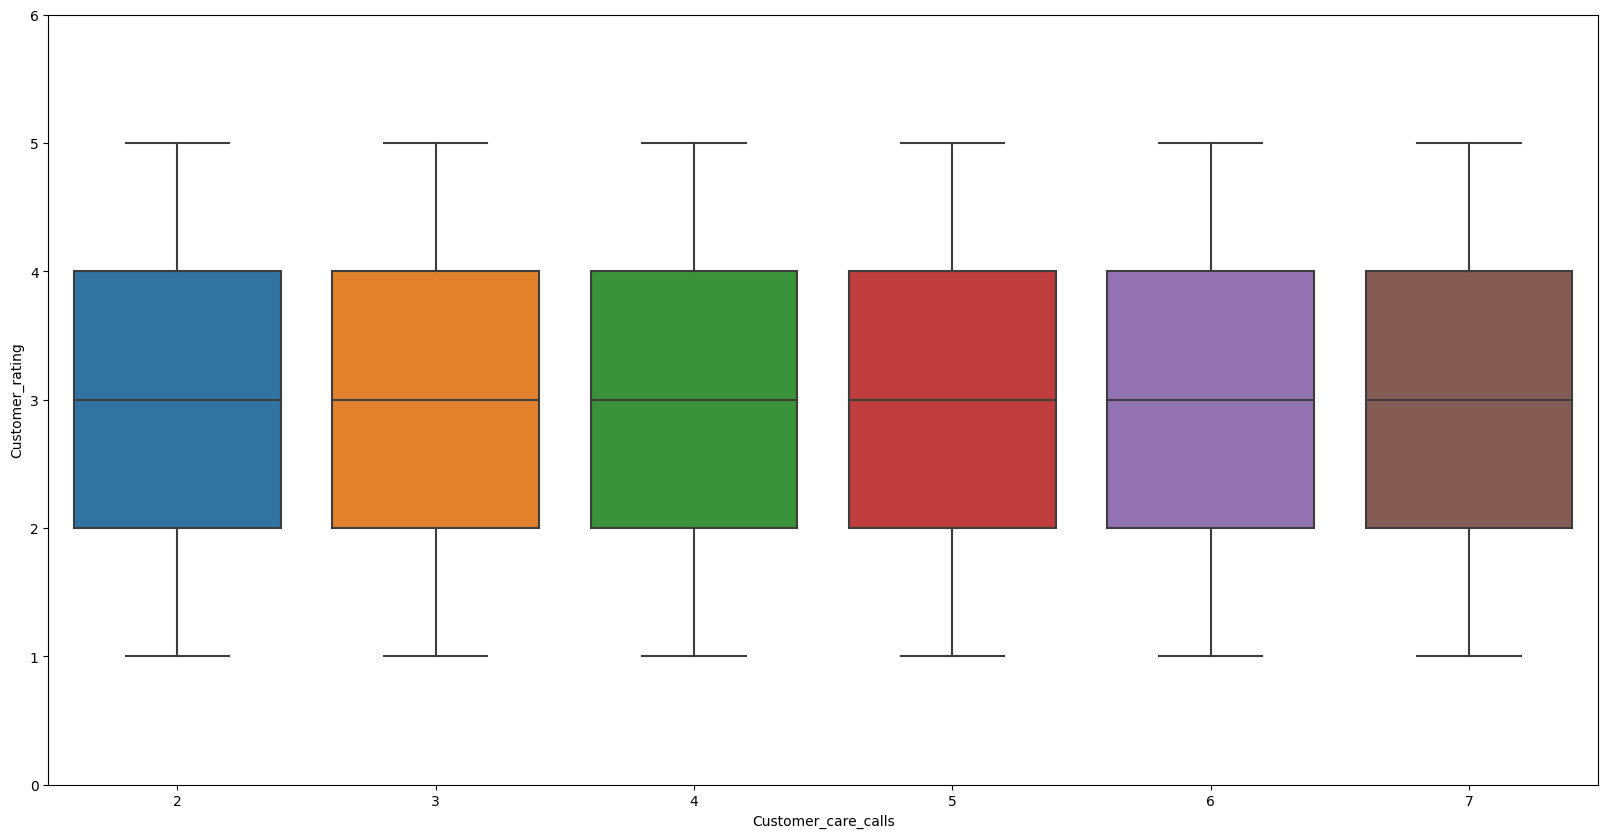

In [28]:
calls = 'Customer_care_calls'
rating = 'Customer_rating'
data = pd.concat([df_ecommerce[calls], df_ecommerce[rating]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=calls, y=rating, data=data)
fig.axis(ymin=0, ymax=6)

#korreliert nicht

Data Cleansing:

In [30]:
df = pd.read_csv("E-Commerce Shipping_data.csv", index_col=0)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10997,C,Ship,5,4,242,5,low,F,4,1155,0


In [31]:
df.isnull().sum()

#TODO more cleaning tests

#daten vollständig

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
#TODO vllt manche kategorien rausnehmen weil unwichtig ?
#TODO outlier testen
#TODO testen ob performance verbessert oder nicht?

Data Transformation:

MultiLabelEncoder:

In [34]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Initalization as shortcut 'le'

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [35]:
df = MultiColumnLabelEncoder(columns= ['Product_importance', 'Gender']).fit_transform(df)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,1,0,44,1233,1
2,F,Flight,4,5,216,2,1,1,59,3088,1
3,A,Flight,2,2,183,4,1,1,48,3374,1
4,B,Flight,3,3,176,4,2,1,10,1177,1
5,C,Flight,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,2,0,1,1538,1
10996,B,Ship,4,1,232,5,2,0,6,1247,0
10997,C,Ship,5,4,242,5,1,0,4,1155,0


In [36]:
# create optimal df for ml methods for reached on time variable
# warehouse block and mode of shipment are not ordinal so we try one hot encoding

#one hot encoding:
df_reachont = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment'])
df_reachont


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
ID,,,,,,,,,,,,,,,,,
1,4,2,177,3,1,0,44,1233,1,False,False,False,True,False,True,False,False
2,4,5,216,2,1,1,59,3088,1,False,False,False,False,True,True,False,False
3,2,2,183,4,1,1,48,3374,1,True,False,False,False,False,True,False,False
4,3,3,176,4,2,1,10,1177,1,False,True,False,False,False,True,False,False
5,2,2,184,3,2,0,46,2484,1,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,4,1,252,5,2,0,1,1538,1,True,False,False,False,False,False,False,True
10996,4,1,232,5,2,0,6,1247,0,False,True,False,False,False,False,False,True
10997,5,4,242,5,1,0,4,1155,0,False,False,True,False,False,False,False,True


In [37]:
#min max scaling für alle restlichen attribute

columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

df_reachont[columns] = (df_reachont[columns] - df_reachont[columns].min()) / (df_reachont[columns].max() - df_reachont[columns].min()) 

df_reachont

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
ID,,,,,,,,,,,,,,,,,
1,0.4,0.25,0.378505,0.125,1,0,0.671875,0.033893,1,False,False,False,True,False,True,False,False
2,0.4,1.00,0.560748,0.000,1,1,0.906250,0.304894,1,False,False,False,False,True,True,False,False
3,0.0,0.25,0.406542,0.250,1,1,0.734375,0.346676,1,True,False,False,False,False,True,False,False
4,0.2,0.50,0.373832,0.250,2,1,0.140625,0.025712,1,False,True,False,False,False,True,False,False
5,0.0,0.25,0.411215,0.125,2,0,0.703125,0.216654,1,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.4,0.00,0.728972,0.375,2,0,0.000000,0.078451,1,True,False,False,False,False,False,False,True
10996,0.4,0.00,0.635514,0.375,2,0,0.078125,0.035939,0,False,True,False,False,False,False,False,True
10997,0.6,0.75,0.682243,0.375,1,0,0.046875,0.022498,0,False,False,True,False,False,False,False,True


In [38]:
#discount und weight correliert kann aber auch gut in classen eingeteilt werden für bessere analyse

cut_bins_discount = [0 , 10 , 65]
discount_labels = ['10', '65']
df_reachont['Discount_offered_split'] = pd.cut(df_reachont['Discount_offered'], bins=cut_bins_discount, labels=discount_labels)
df_reachont['Discount_offered_split'].value_counts()


Discount_offered_split
10    10175
65        0
Name: count, dtype: int64

In [39]:
from scipy.stats import binned_statistic

mean_stat_discount = binned_statistic(df_reachont['Discount_offered'],df_reachont['Discount_offered'], bins = cut_bins_discount, 
                             statistic='mean')
mean_stat_discount

#4.99159103, 31.27887083 mean

BinnedStatisticResult(statistic=array([0.1933315,       nan]), bin_edges=array([ 0., 10., 65.]), binnumber=array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [40]:
values_discount = {4.99, 31.28}

df_reachont.replace(to_replace=discount_labels, value=values_discount, inplace=True)

In [41]:
cut_bins_weight = [0 , 2000 , 4000, 6000, 8000]
weight_labels = ['1500','3000', '5000', '7000']
df_reachont['Weight_in_gms_split'] = pd.cut(df_reachont['Weight_in_gms'], bins=cut_bins_weight, labels=weight_labels)
df_reachont['Weight_in_gms_split'].value_counts()

Weight_in_gms_split
1500    10996
3000        0
5000        0
7000        0
Name: count, dtype: int64

In [42]:
from scipy.stats import binned_statistic

mean_stat_weight = binned_statistic(df_reachont['Weight_in_gms'],df_reachont['Weight_in_gms'], bins = cut_bins_weight, 
                             statistic='mean')
mean_stat_weight

#1493.44585005, 2998.23575419, 4983.80241732, 6812.63636364 mean

BinnedStatisticResult(statistic=array([0.38466278,        nan,        nan,        nan]), bin_edges=array([   0., 2000., 4000., 6000., 8000.]), binnumber=array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [43]:
values_weight = {1493, 2998, 4983, 6812}

df_reachont.replace(to_replace=weight_labels, value=values_weight, inplace=True)
df_reachont

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Discount_offered_split,Weight_in_gms_split
ID,,,,,,,,,,,,,,,,,,,
1,0.4,0.25,0.378505,0.125,1,0,0.671875,0.033893,1,False,False,False,True,False,True,False,False,4.99,6812
2,0.4,1.00,0.560748,0.000,1,1,0.906250,0.304894,1,False,False,False,False,True,True,False,False,4.99,6812
3,0.0,0.25,0.406542,0.250,1,1,0.734375,0.346676,1,True,False,False,False,False,True,False,False,4.99,6812
4,0.2,0.50,0.373832,0.250,2,1,0.140625,0.025712,1,False,True,False,False,False,True,False,False,4.99,6812
5,0.0,0.25,0.411215,0.125,2,0,0.703125,0.216654,1,False,False,True,False,False,True,False,False,4.99,6812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.4,0.00,0.728972,0.375,2,0,0.000000,0.078451,1,True,False,False,False,False,False,False,True,NaN,6812
10996,0.4,0.00,0.635514,0.375,2,0,0.078125,0.035939,0,False,True,False,False,False,False,False,True,4.99,6812
10997,0.6,0.75,0.682243,0.375,1,0,0.046875,0.022498,0,False,False,True,False,False,False,False,True,4.99,6812


In [44]:
df_reachont.to_csv('df_cleaned')

In [45]:
df_reachont.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered',
       'Weight_in_gms', 'Reached.on.Time_Y.N', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Discount_offered_split',
       'Weight_in_gms_split'],
      dtype='object')

In [46]:
#drop alle attribute basierend auf heatmap werten:
#'Customer_care_calls','Customer_rating', 'Cost_of_the_Product', 'Prior_purchases','Product_importance', 'Gender', 'Warehouse_block_A',
#       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
 #      'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
  #     'Mode_of_Shipment_Ship'

df_test = df_reachont.drop(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Gender',
       'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship','Discount_offered_split','Weight_in_gms_split'], axis=1)

df_test

,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,
1,1,0.671875,0.033893,1
2,1,0.906250,0.304894,1
3,1,0.734375,0.346676,1
4,2,0.140625,0.025712,1
5,2,0.703125,0.216654,1
...,...,...,...,...
10995,2,0.000000,0.078451,1
10996,2,0.078125,0.035939,0
10997,1,0.046875,0.022498,0


In [47]:
reached = 'Reached.on.Time_Y.N'

columns_cleaned = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered',
       'Weight_in_gms', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship']

for j in columns_cleaned:
    print(j)
    print(df_reachont[reached].corr(df_reachont[j]))

Customer_care_calls
-0.06712585571198343
Customer_rating
0.013118604264753567
Cost_of_the_Product
-0.07358721059030143
Prior_purchases
-0.05551501121359654
Product_importance
-0.023483281845497694
Gender
0.00468887433714151
Discount_offered
0.3971084735832174
Weight_in_gms
-0.2687925839387989
Warehouse_block_A
-0.009316717344488516
Warehouse_block_B
0.005105534337540727
Warehouse_block_C
0.00013234410235824285
Warehouse_block_D
0.0008300554623368948
Warehouse_block_F
0.00256821063288154
Mode_of_Shipment_Flight
0.004371285442705478
Mode_of_Shipment_Road
-0.007671487442096027
Mode_of_Shipment_Ship
0.0025770267459091054


<Axes: >

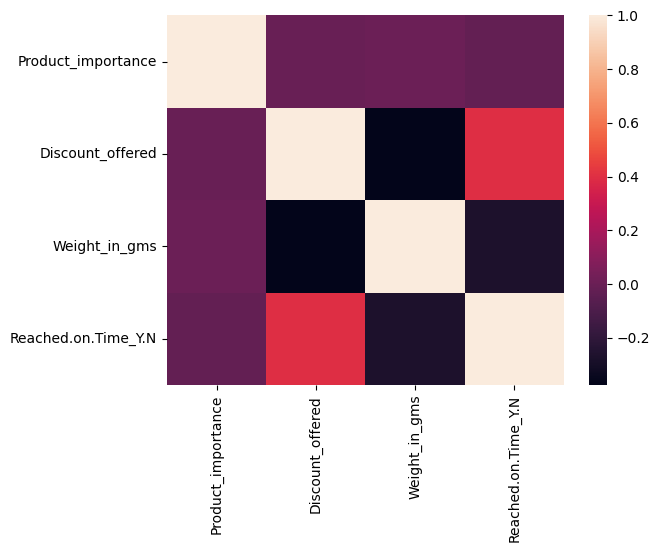

In [48]:
sns.heatmap(df_test.corr())

Machine Learning:

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [50]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], 
                        columns=[model_name])

Reached on Time:
predict whether the ordered product will be reached on time or not

In [51]:
x = df_test.drop(['Reached.on.Time_Y.N'], axis=1)
y = df_test['Reached.on.Time_Y.N']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
x_train.shape, x_test.shape

((7369, 3), (3630, 3))

Logistic Regression:

In [53]:
logreg = LogisticRegression(solver="liblinear", random_state = 42)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [54]:
logreg.coef_

array([[-0.08101349,  6.81055654, -1.07391333]])

In [55]:
logreg.intercept_

array([0.05573115])

In [56]:
y_pred_test = logreg.predict(x_test)

In [57]:
print(accuracy_score(y_test, y_pred_test))

0.6305785123966943


In [58]:
y_pred_train = logreg.predict(x_train)
y_pred_train

print(accuracy_score(y_train, y_pred_train))

0.6341430316189443


In [59]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1446
           1       0.70      0.67      0.69      2184

    accuracy                           0.63      3630
   macro avg       0.62      0.62      0.62      3630
weighted avg       0.63      0.63      0.63      3630



In [108]:
kf = KFold(n_splits=10, shuffle=True, random_state=100)

score = cross_val_score(logreg, x, y, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold: {score}')

Accuracy scores for each fold: [0.63636364 0.63545455 0.60363636 0.62727273 0.65181818 0.63545455
 0.62181818 0.61727273 0.66363636 0.63967243]


In [111]:
parameters = [{"C":[1,2,3,4,5,6,7,8,9,10]}]

grid_search = GridSearchCV(estimator=logreg, param_grid=parameters, scoring="accuracy", cv=kf, verbose=0)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1}
0.6340094242227599


Polynomial Regression:

In [62]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)

x_poly = poly_features.fit_transform(x)
x_poly = pd.DataFrame(x_poly, columns = poly_features.get_feature_names_out(x.columns))


In [63]:
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly, y, test_size=0.25, random_state=42)

In [64]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_poly_train)

LinearRegression()

In [65]:
y_poly_pred = poly_reg.predict(x_poly_test)

In [66]:
model_evaluation(poly_reg, x_poly_test, y_poly_test, 'Poly Reg. Results')


,Poly Reg. Results
MAE,0.387686
MSE,0.187900
RMSE,0.433474
R2-Score,0.217084


In [67]:
model_evaluation(poly_reg, x_poly_train, y_poly_train, 'Poly Reg. Results_Train')

,Poly Reg. Results_Train
MAE,0.389292
MSE,0.189425
RMSE,0.435230
R2-Score,0.213557


KNN:

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
y_pred = knn.predict(x_test)

In [70]:
print(accuracy_score(y_test, y_pred))

0.6523415977961432


In [71]:
y_pred_train_knn = knn.predict(x_train)

In [72]:
#hohes ergebnis weil unhomogene daten, später cross val zeigt wenn geshuffelt nicht mehr so hoch
print(accuracy_score(y_train, y_pred_train_knn))

0.8214140317546479


In [101]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

score = cross_val_score(knn, x_test, y_test, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold: {score}')

Accuracy scores for each fold: [0.66115702 0.68319559 0.68319559 0.63085399 0.65564738 0.7107438
 0.68870523 0.66666667 0.65013774 0.65013774]


In [102]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

score = cross_val_score(knn, x_train, y_train, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold: {score}')

Accuracy scores for each fold: [0.65671642 0.66892809 0.68656716 0.69199457 0.63636364 0.65400271
 0.64993216 0.68249661 0.66078697 0.66168478]


In [74]:
neighbors = np.arange(10,100)

test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

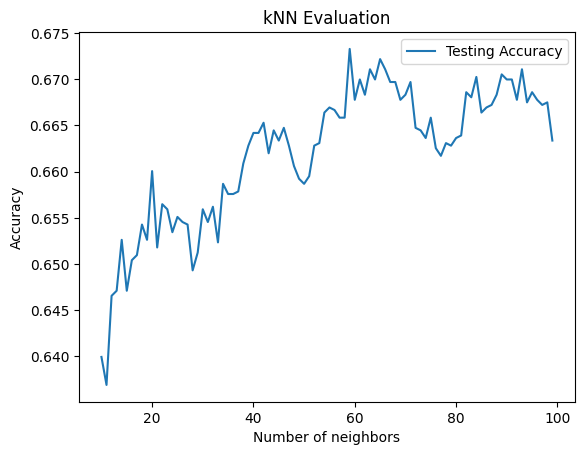

In [75]:
plt.title("kNN Evaluation")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy", )
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

Decision Tree:

Dt with gini:

In [76]:
dt_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [77]:
y_pred_test_gini = dt_gini.predict(x_test)

In [78]:
print(accuracy_score(y_test, y_pred_test_gini))

0.6807162534435262


In [79]:
y_pred_train_gini = dt_gini.predict(x_train)

print(accuracy_score(y_train, y_pred_train_gini))

0.6707830099063645


In [80]:
print(classification_report(y_test, y_pred_test_gini))

              precision    recall  f1-score   support

           0       0.58      0.73      0.65      1446
           1       0.78      0.65      0.71      2184

    accuracy                           0.68      3630
   macro avg       0.68      0.69      0.68      3630
weighted avg       0.70      0.68      0.68      3630



In [81]:
#does cross validation for 10 folds for gini

kf = KFold(n_splits=10, shuffle=True, random_state=42)

score = cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42),
                        x, y, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold: {score}')

Accuracy scores for each fold: [0.67       0.69090909 0.67636364 0.67454545 0.67727273 0.64909091
 0.66272727 0.66272727 0.67090909 0.67242948]


In [120]:
#checks depth of tree 1-11 for average over 10 folds for gini

max_depth = range(1, 12)

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=val, min_samples_split=2, min_samples_leaf=1, random_state=42),
                        x, y, cv=kf, scoring="accuracy")
    print(f'Average accuracy score({val}): {"{:.3f}".format(score.mean())}')

Average accuracy score(1): 0.644
Average accuracy score(2): 0.672
Average accuracy score(3): 0.672
Average accuracy score(4): 0.673
Average accuracy score(5): 0.671
Average accuracy score(6): 0.671
Average accuracy score(7): 0.668
Average accuracy score(8): 0.670
Average accuracy score(9): 0.665
Average accuracy score(10): 0.667
Average accuracy score(11): 0.666


In [83]:
#decision tree and accuracy for tree without pruning for gini

dt_noparam = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=42)
dt_noparam.fit(x_train, y_train)

y_pred = dt_noparam.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.6548209366391184


In [118]:
#checks best params for max_depth, min_leafs and min_splits

params = {'max_depth': range(1,20), 'min_samples_split': range(2,5), 'min_samples_leaf': range(1,3)}

clf=tree.DecisionTreeClassifier()

gcv=GridSearchCV(estimator=clf, param_grid=params,scoring="accuracy", cv=kf, verbose=0)
gcv.fit(x_train, y_train)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.6684780765146598


Dt with entropy:

In [85]:
dt_ent = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_ent.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [86]:
y_pred_test_ent = dt_ent.predict(x_test)
print(accuracy_score(y_test, y_pred_test_ent))

0.6807162534435262


In [87]:
y_pred_train_ent = dt_ent.predict(x_train)
print(accuracy_score(y_train, y_pred_train_ent))

0.6707830099063645


In [88]:
print(classification_report(y_test, y_pred_test_ent))

              precision    recall  f1-score   support

           0       0.58      0.73      0.65      1446
           1       0.78      0.65      0.71      2184

    accuracy                           0.68      3630
   macro avg       0.68      0.69      0.68      3630
weighted avg       0.70      0.68      0.68      3630



In [94]:
#does cross validation for 10 folds for entropy

kf = KFold(n_splits=10, shuffle=True, random_state=42)

score = cross_val_score(tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42),
                        x, y, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold: {score}')

Accuracy scores for each fold: [0.67       0.69090909 0.67636364 0.67454545 0.67727273 0.64909091
 0.66272727 0.66272727 0.67090909 0.67242948]


In [95]:
#checks depth of tree 1-11 for average over 10 folds for entropy

max_depth = range(1, 12)

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=val, min_samples_split=2, min_samples_leaf=1, random_state=42),
                        x, y, cv=kf, scoring="accuracy")
    print(f'Average accuracy score({val}): {"{:.3f}".format(score.mean())}')

Average accuracy score(1): 0.644
Average accuracy score(2): 0.671
Average accuracy score(3): 0.671
Average accuracy score(4): 0.669
Average accuracy score(5): 0.664
Average accuracy score(6): 0.661
Average accuracy score(7): 0.662
Average accuracy score(8): 0.661
Average accuracy score(9): 0.663
Average accuracy score(10): 0.662
Average accuracy score(11): 0.662


In [96]:
#decision tree and accuracy for tree without pruning for entropy

dt_noparam = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=42)
dt_noparam.fit(x_train, y_train)

y_pred = dt_noparam.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.6534435261707989


Dt with log loss:

In [89]:
dt_log = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_log.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, random_state=42)

In [90]:
y_pred_test_log = dt_log.predict(x_test)
print(accuracy_score(y_test, y_pred_test_log))

0.6807162534435262


In [91]:
y_pred_train_log = dt_log.predict(x_train)
print(accuracy_score(y_train, y_pred_train_log))

0.6707830099063645


In [97]:
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.58      0.73      0.65      1446
           1       0.78      0.65      0.71      2184

    accuracy                           0.68      3630
   macro avg       0.68      0.69      0.68      3630
weighted avg       0.70      0.68      0.68      3630



In [98]:
#does cross validation for 10 folds for logloss

kf = KFold(n_splits=10, shuffle=True, random_state=42)

score = cross_val_score(tree.DecisionTreeClassifier(criterion="log_loss", splitter="best", max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42),
                        x, y, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold: {score}')

Accuracy scores for each fold: [0.67       0.69090909 0.67636364 0.67454545 0.67727273 0.64909091
 0.66272727 0.66272727 0.67090909 0.67242948]


In [99]:
#checks depth of tree 1-11 for average over 10 folds for logloss

max_depth = range(1, 12)

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=val, min_samples_split=2, min_samples_leaf=1, random_state=42),
                        x, y, cv=kf, scoring="accuracy")
    print(f'Average accuracy score({val}): {"{:.3f}".format(score.mean())}')

Average accuracy score(1): 0.644
Average accuracy score(2): 0.671
Average accuracy score(3): 0.671
Average accuracy score(4): 0.669
Average accuracy score(5): 0.664
Average accuracy score(6): 0.661
Average accuracy score(7): 0.662
Average accuracy score(8): 0.661
Average accuracy score(9): 0.663
Average accuracy score(10): 0.662
Average accuracy score(11): 0.662


In [100]:
#decision tree and accuracy for tree without pruning for entropy

dt_noparam = DecisionTreeClassifier(criterion="log_loss", splitter="best", random_state=42)
dt_noparam.fit(x_train, y_train)

y_pred = dt_noparam.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.6534435261707989


predict the cost of the product for the company